#📌 Extracción

In [2]:
import pandas as pd
import numpy as np
datos=pd.read_json('TelecomX_Data.json')
df = pd.DataFrame(datos)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df.shape

(7267, 6)

In [4]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [6]:
# Normalizamos el DataFrame 'datos' aplanando todas las columnas que contienen diccionarios anidados.
# Convertimos el DataFrame a una lista de registros y con json_normalize expandimos los diccionarios en nuevas columnas.
# Usamos 'sep='_' para que los nombres de las columnas anidadas se separen con un guion bajo en lugar de un punto.
df_normalized = pd.json_normalize(datos.to_dict('records'), sep='_')
df_normalized.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
# Uso .unique()
# Para ver los valores únicos en la columna de Churn
display(df_normalized['Churn'].unique())

# Para ver los valores únicos en el servicio de Internet
display(df_normalized['internet_InternetService'].unique())

# Para ver los valores únicos en el género del cliente
display(df_normalized['customer_gender'].unique())

array(['No', 'Yes', ''], dtype=object)

array(['DSL', 'Fiber optic', 'No'], dtype=object)

array(['Female', 'Male'], dtype=object)

In [8]:
import numpy as np

# Reemplazar los valores vacíos en la columna 'Churn' con NaN
df_normalized['Churn'] = df_normalized['Churn'].replace('', np.nan)

# Verificar los valores únicos de nuevo para confirmar el cambio
display(df_normalized['Churn'].unique())

array(['No', 'Yes', nan], dtype=object)

In [9]:
df_normalized.columns = df_normalized.columns.str.lower().str.replace(' ', '_')
df_normalized.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [10]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [11]:
df_normalized.dtypes

customerid                    object
churn                         object
customer_gender               object
customer_seniorcitizen         int64
customer_partner              object
customer_dependents           object
customer_tenure                int64
phone_phoneservice            object
phone_multiplelines           object
internet_internetservice      object
internet_onlinesecurity       object
internet_onlinebackup         object
internet_deviceprotection     object
internet_techsupport          object
internet_streamingtv          object
internet_streamingmovies      object
account_contract              object
account_paperlessbilling      object
account_paymentmethod         object
account_charges_monthly      float64
account_charges_total         object
dtype: object

In [12]:
# Convertir la columna account_charges_total a tipo numérico (float)
# Con 'errors="coerce"' convertirá cualquier valor que no pueda ser transformado a NaN
df_normalized['account_charges_total'] = pd.to_numeric(df_normalized['account_charges_total'], errors='coerce')
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [13]:
# Reemplazar cadenas vacías o espacios en blanco con NaN en 'account_charges_total'
df_normalized['account_charges_total'] = df_normalized['account_charges_total'].replace(r'^\s*$', np.nan, regex=True)
df_normalized['account_charges_total']

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7262     742.90
7263    1873.70
7264      92.75
7265    4627.65
7266    3707.60
Name: account_charges_total, Length: 7267, dtype: float64

In [14]:
# Filtrar filas donde la columna 'churn' es NaN, y mostrar las primeras filas de ese subconjunto
# Además, contamos cuántas filas tienen NaN en esa columna
df_churn_nan = df_normalized[df_normalized['churn'].isna()]
display(df_churn_nan.head())
print(f"Número de filas con NaN en la columna 'churn': {len(df_churn_nan)}")

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
30,0047-ZHDTW,NaN,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,NaN,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,NaN,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,NaN,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,NaN,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45


Número de filas con NaN en la columna 'churn': 224


In [15]:
df_normalized.columns

Index(['customerid', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_monthly', 'account_charges_total'],
      dtype='object')

In [16]:
# Creamos la columna 'cuentas_diarias' y para calcular la facturación diaria, tomamos la facturación
# mensual y la dividimos por 30 (promedio de días por mes)
df_normalized['cuentas_diarias'] = df_normalized['account_charges_monthly'] / 30
# Imprimimos las primeras filas
display(df_normalized.head())

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [17]:
# Verificamos tipo de dato y existencia de la columna
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [18]:
# Eliminamos las filas del DataFrame donde churn tiene valores NaN.
# Con 'subset' aseguramos que solo se consideren los NaN en esta columna específica para la eliminación
# inplace=True modifica el DataFrame directamente sin necesitdad de asignarlo a una nueva variable.
df_normalized.dropna(subset=['churn'], inplace=True)
df_normalized.shape

(7043, 22)

In [19]:
nan_in_churn = df_normalized['churn'].isnull().sum()
print(f"Número de valores NaN en la columna 'churn': {nan_in_churn}")

Número de valores NaN en la columna 'churn': 0


In [20]:
# Lista de columnas que se espera contengan valores 'Yes'/'No'
# Excluimos 'churn' de esta lista para tratarla por separado como variable objetivo binaria.
# Y customer_seniorcitizen ya es 0/1

columns_to_map = [
    'customer_partner',
    'customer_dependents',
    'phone_phoneservice',
    'phone_multiplelines',
    'internet_onlinesecurity',
    'internet_onlinebackup',
    'internet_deviceprotection',
    'internet_techsupport',
    'internet_streamingtv',
    'internet_streamingmovies',
    'account_paperlessbilling'
]

# Aseguramos que solo se incluyan columnas que realmente existen en el DataFrame y que contengan 'Yes'/'No'
# Primero, vamos a manejar 'churn' de forma independiente para asegurar que los valores 'No' y 'Yes' se mapeen correctamente.
# La columna 'churn' ya ha sido limpiada de NaN y sus valores son 'No' y 'Yes'.

# Es crucial asegurarse de que no haya NaN en 'churn' antes de la conversión a int.
# Se añade dropna aquí nuevamente para asegurar la robustez del proceso en caso de ejecuciones parciales o previas fallidas.
df_normalized.dropna(subset=['churn'], inplace=True)

churn_mapping = {'No': 0, 'Yes': 1}
df_normalized['churn'] = df_normalized['churn'].map(churn_mapping).fillna(0).astype(int)

# Mapeo para el resto de las columnas binarias
binary_mapping = {'Yes': 1, 'No': 0}

for col in columns_to_map:
    if col in df_normalized.columns:
        # Convertimos solo si la columna tiene los valores 'Yes' o 'No'
        # Convertir a string para evitar problemas si son de tipo 'category' y no tienen 'Yes'/'No'
        if df_normalized[col].astype(str).isin(['Yes', 'No']).any():
            df_normalized[col] = df_normalized[col].map(binary_mapping).fillna(0).astype(int)

print("Primeras 5 filas del DataFrame con las columnas binarias transformadas:")
display(df_normalized.head())

print("\nTipos de datos actualizados para verificar la transformación:")
display(df_normalized.dtypes)

Primeras 5 filas del DataFrame con las columnas binarias transformadas:


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667



Tipos de datos actualizados para verificar la transformación:


customerid                    object
churn                          int64
customer_gender               object
customer_seniorcitizen         int64
customer_partner               int64
customer_dependents            int64
customer_tenure                int64
phone_phoneservice             int64
phone_multiplelines            int64
internet_internetservice      object
internet_onlinesecurity        int64
internet_onlinebackup          int64
internet_deviceprotection      int64
internet_techsupport           int64
internet_streamingtv           int64
internet_streamingmovies       int64
account_contract              object
account_paperlessbilling       int64
account_paymentmethod         object
account_charges_monthly      float64
account_charges_total        float64
cuentas_diarias              float64
dtype: object

#📊 Carga y análisis

In [21]:
# Estadísticas Descriptivas para Columnas Numéricas
# Calculamos métricas clave como la media, la mediana, la desviación estándar, el mínimo, el máximo y los cuartiles 
# para todas las columnas numéricas en el DataFrame
df_normalized.describe()

,churn,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_paperlessbilling,account_charges_monthly,account_charges_total,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [22]:
# Estadísticas Descriptivas para Columnas Categóricas
# Examinamos las columnas categóricas para entender la distribución de sus valores, incluyendo el conteo, 
# el número de valores únicos, el valor más frecuente y su frecuencia.
display(df_normalized.describe(include='object'))

,customerid,customer_gender,internet_internetservice,account_contract,account_paymentmethod
count,7043,7043,7043,7043,7043
unique,7043,2,3,3,4
top,0002-ORFBO,Male,Fiber optic,Month-to-month,Electronic check
freq,1,3555,3096,3875,2365


In [23]:
# Distribución de Frecuencias para Columnas Categóricas Clave
# Para obtener una visión más detallada, mostramos la distribución de frecuencias para cada columna
# lo que nos ayudará a identificar patrones y desequilibrios.

categorical_cols = df_normalized.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n--- Columna '{col.upper()}' ---")
    display(df_normalized[col].value_counts())
    print(f"Porcentaje de la distribución de '{col.upper()}':")
    display(df_normalized[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')


--- Columna 'CUSTOMERID' ---


customerid
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
9995-HOTOH    1
Name: count, Length: 7043, dtype: int64

Porcentaje de la distribución de 'CUSTOMERID':


customerid
0002-ORFBO    0.01%
0003-MKNFE    0.01%
0004-TLHLJ    0.01%
0011-IGKFF    0.01%
0013-EXCHZ    0.01%
              ...  
9987-LUTYD    0.01%
9992-RRAMN    0.01%
9992-UJOEL    0.01%
9993-LHIEB    0.01%
9995-HOTOH    0.01%
Name: proportion, Length: 7043, dtype: object


--- Columna 'CUSTOMER_GENDER' ---


customer_gender
Male      3555
Female    3488
Name: count, dtype: int64

Porcentaje de la distribución de 'CUSTOMER_GENDER':


customer_gender
Male      50.48%
Female    49.52%
Name: proportion, dtype: object


--- Columna 'INTERNET_INTERNETSERVICE' ---


internet_internetservice
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Porcentaje de la distribución de 'INTERNET_INTERNETSERVICE':


internet_internetservice
Fiber optic    43.96%
DSL            34.37%
No             21.67%
Name: proportion, dtype: object


--- Columna 'ACCOUNT_CONTRACT' ---


account_contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Porcentaje de la distribución de 'ACCOUNT_CONTRACT':


account_contract
Month-to-month    55.02%
Two year          24.07%
One year          20.91%
Name: proportion, dtype: object


--- Columna 'ACCOUNT_PAYMENTMETHOD' ---


account_paymentmethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Porcentaje de la distribución de 'ACCOUNT_PAYMENTMETHOD':


account_paymentmethod
Electronic check             33.58%
Mailed check                 22.89%
Bank transfer (automatic)    21.92%
Credit card (automatic)      21.61%
Name: proportion, dtype: object

In [24]:
# Contar los resultados de 'churn'
churn_counts = df_normalized['churn'].value_counts()
churn_counts

churn
0    5174
1    1869
Name: count, dtype: int64

In [26]:
# Calcular los porcentajes de los resultados de 'churn'
churn_percentages = df_normalized['churn'].value_counts(normalize=True) * 100
churn_percentages.map('{:.2f}%'.format)

churn
0    73.46%
1    26.54%
Name: proportion, dtype: object

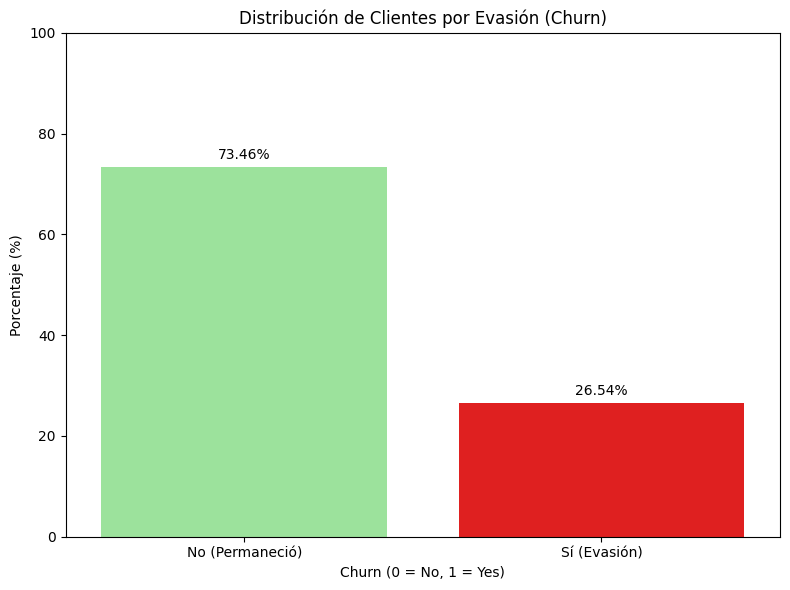

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos una paleta de colores personalizada: verde para 'No' (0) y rojo para 'Sí' (1)
custom_palette = {0: 'lightgreen', 1: 'red'}

# Creamos un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_percentages.index, y=churn_percentages.values, hue=churn_percentages.index, palette=custom_palette, legend=False)
plt.title('Distribución de Clientes por Evasión (Churn)')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Porcentaje (%)')
plt.xticks(ticks=[0, 1], labels=['No (Permaneció)', 'Sí (Evasión)'], rotation=0)
plt.ylim(0, 100) # Para asegurar que el eje y vaya de 0 a 100%

# Añadimos etiquetas de porcentaje en las barras
for index, value in enumerate(churn_percentages.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#📄Informe final